In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(47)

% matplotlib inline

In [2]:
def resample(weights, algorithm):
    num_weights = len(weights)
    if algorithm == 'multinomial':
        uniforms = np.random.rand(num_weights)
    elif algorithm == 'stratified':
        uniforms = np.random.rand(num_weights) / num_weights + np.arange(num_weights) / num_weights
    elif algorithm == 'systematic':
        uniforms = np.random.rand() / num_weights + np.arange(num_weights) / num_weights
    else:
        raise NotImplementedError()
    
    return np.digitize(uniforms, bins=np.cumsum(weights))

Saved figure to resampling.pdf
Saved figure to resampling.png


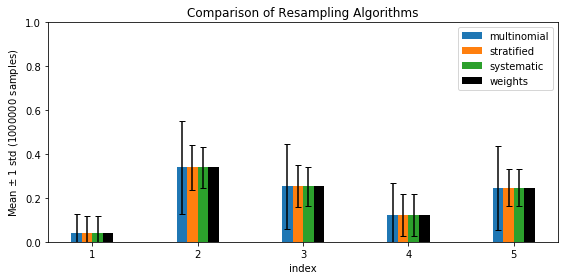

In [3]:
num_weights = 5
unnormalized_weights = np.random.rand(num_weights)
weights = unnormalized_weights / np.sum(unnormalized_weights)
algorithms = ['multinomial', 'stratified', 'systematic']
num_samples = 1000000

resampled_indices_means = np.zeros([len(algorithms), num_weights])
resampled_indices_stds = np.zeros([len(algorithms), num_weights])
for algorithm_idx, algorithm in enumerate(algorithms):
    resampled_indices = np.zeros([num_samples, num_weights], dtype=int)
    for num_samples_idx in range(num_samples):
        resampled_indices[num_samples_idx] = resample(weights, algorithm)
       
    resampled_indices_freq = np.array([np.bincount(ri, minlength=num_weights) for ri in resampled_indices]) / num_weights
    resampled_indices_means[algorithm_idx] = np.mean(resampled_indices_freq, axis=0)
    resampled_indices_stds[algorithm_idx] = np.std(resampled_indices_freq, axis=0)
    
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 4)

bin_locations = np.arange(num_weights)
bin_width = 0.1
num_std = 1

for i, algorithm in enumerate(algorithms):
    ax.bar(
        bin_locations + i * bin_width,
        height=resampled_indices_means[i],
        width=bin_width,
        yerr=num_std * resampled_indices_stds[i],
        label=algorithm,
        capsize=3
    )

ax.bar(
    bin_locations + len(algorithms) * bin_width,
    height=weights,
    width=bin_width,
    color='black',
    label='weights'
)
ax.set_xticks(bin_locations + len(algorithms) * bin_width / 2)
ax.set_xticklabels(np.arange(1, num_weights + 1))
ax.set_ylim([0, 1])
ax.set_xlabel('index')
ax.set_ylabel('Mean $\pm$ {} std ({} samples)'.format(num_std, num_samples))
ax.set_title('Comparison of Resampling Algorithms')
ax.legend()
fig.tight_layout()
filenames = ['resampling.pdf', 'resampling.png']
for filename in filenames:
    fig.savefig(filename, bbox_inches='tight')
    print('Saved figure to {}'.format(filename))